# Roman Redshift Analysis

## Roman Parameters and Requirements
https://roman.gsfc.nasa.gov/science/technical_resources.html

## Table of Contents

1. Setup
    1. [Import Python modules](#Import-Python-modules)  
    2. [Python Helper Functions](#Python-Helper-Functions)
    3. [Path to my simulation directories](#Path-to-my-simulation-directories)
2. [Read SExtractor Photometry of Direct Images](#Read-SExtractor-Photometry-of-Direct-Images)
3. [Check simulation](#Check-simulation)
4. [Inspect Redshift Fitting Results](#Inspect-Redshift-Fitting-Results)

[top](#Table-of-Contents)

In [2]:
%matplotlib inline

In [62]:
import importlib
importlib.reload(grizli_functions)

NameError: name 'grizli_functions' is not defined

In [63]:
import importlib
importlib.reload(grizli_analysis)

<module 'grizli_analysis' from '/home/gwalth/python.linux/dev/grizli_analysis.py'>

## Import Python modules
[top](#Table-of-Contents)

In [29]:
import os,sys
#import glob
#from collections import OrderedDict

import matplotlib as mpl    
import matplotlib.pyplot as plt

#from IPython.display import Image

mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.rcParams['font.size'] = 14
mpl.rcParams['savefig.dpi'] = 72

import numpy as np

import astropy
#import astropy.io.fits as pyfits
from astropy.table import Table, join, vstack
import astropy.units as u
#from astropy.coordinates import SkyCoord

import grizli

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

#import time
#import pickle
#import gc

# display_grizli
#from grizli import multifit

print('\n Python version: ', sys.version)
print('\n Grizli version: ', grizli.__version__)
print('\n Astropy version: ', astropy.__version__)


 Python version:  3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]

 Grizli version:  1.5.1.dev126

 Astropy version:  5.1


In [ ]:
dir()

## Python Helper Functions

In [64]:
import grizli_analysis
from grizli_analysis import display_grizli
from grizli_analysis import check_primers
from grizli_analysis import check_all_phot, check_all_redshift_fits
from grizli_analysis import check_roll_phot, check_roll_redshift_fits
from grizli_analysis import build_all_tables, build_roll_tables
from grizli_analysis import plot_redshifts, plot_redshifts2
from grizli_analysis import sample_numbers, sample_numbers2, sample_numbers3
from grizli_analysis import emline_bar_chart, emline_bar_chart2
from grizli_analysis import sn_dz_plot, sn_dz_hist2d_plot

These will eventually be replaced by grizli_functions library

In [5]:
emlines = [["OVI",          1038.0],             # 0                                                                                                      
           ["Ly$\\alpha$",  1215.67],            # 1                                                                                                      
           ["CIV",          1550.0],             # 2                                                                                                  
           ["CIII]",        1909.],              # 3                                                                                                  
           ["CII]",         2327.],              # 4                                                                                                  
           ["MgII",         2796.4],             # 5                                                                                                  
           ["MgII",         2803.5],             # 6                                                                                                  
           ["NeV",          3326.],              # 7                                                                                                  
           ["[OII]",        3727.],   # O2       # 8                                                                                                  
           ["[NeIII]",      3868.7],             # 9                                                                                                  
           ["H$\gamma$",    4340.5],  # Hg       # 10                                                                                                    
           ["[OIII]",       4363.0],  # O31      # 11                                                                                                 
           ["H$\\beta$",    4861.3],  # Hb       # 12                                                                                                     
           ["[OIII]",       4959.0],  # O32      # 13                                                                                                 
           ["[OIII]",       5007.0],  # O33      # 14                                                                                                 
           ["[NII]",        6548.1],             # 15                                                                                                 
           ["H$\\alpha$",   6562.8],  # Ha       # 16                                                                                                     
           ["[NII]",        6583.0],             # 17                                                                                                 
           ["[SII]",        6717.0],             # 18                                                                                                 
           ["[SII]",        6731.0],             # 19
           ["[SIII]",       9069.0],             
           ["[SIII]",       9545.0],
           ["P$\\delta$",  10049.8],  # Pd       # 20                                                                                                     
           ["P$\\gamma$",  10938.0],  # Pg       # 21                                                                                                     
           ["P$\\beta$",   12818.1],  # Pb       # 22                                                                                                     
           ["P$\\alpha$",  18750.1],  # Pa       # 23                                                                                                     
           ["Br$\\delta$", 19440.0],  # Br-d (wikipedia, not exact)                                                                                   
           ["Br$\\gamma$", 21660.0],  # Br-g (wikipedia, not exact)                                                                                   
           ["Br$\\beta$",  26250.0],  # Br-b (wikipedia, not exact)                                                                                   
           ["Br$\\alpha$", 40510.0],  # Br-a (wikipedia, not exact)                                                                                   
          ]                                                                                                                                           
                                                                                                                                                      
# http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/hydspec.html                                                                                      
# http://articles.adsabs.harvard.edu//full/1934ApJ....80...19M/0000022.000.html

## Start checks here

In [ ]:
dir()

In [6]:
root = "hlss_single_v5"
HOME_PATH = "/home/gwalth/data/Roman/grizli/sims"
LOCAL_PATH = "/home/gwalth/data/Roman/grizli/sims"

In [7]:
#check_primers(root = "sim_v3", PREP_PATH = "Prep/field_0018")
#check_primers(root = "hlss") 
#check_primers(root = "hlss_single") 
check_primers(root = "hlss_single_v5") 

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusc
['Euclid_Roman_4deg2_field_0018.fits']
Euclid_Roman_4deg2_field_0018.fits
13260
['num', 'RA', 'DEC', 'x_pix', 'y_pix', 'a_pix', 'b_pix', 'PA', 'm', 'm_new', 'z_true', 'z_axe', 'sim_num', 'spec_num', 'spec_file', 'spectemp', 'modimage', 'flux_Ha', 'flux_OIII']

1


HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /local/RomanSims/grizli/sims
cygnusc
2329
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3'

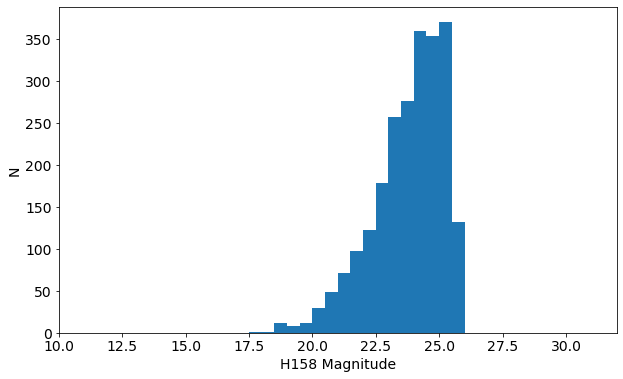

In [8]:
#check_all_phot(root = "sim_v3", prefix="field", mag_key="MAG_AUTO", verb=0)
#check_roll_phot(root = "hlss", cat = "hlss_phot.fits", verb=1)
#check_roll_phot(root = "hlss_single", cat = "hlss_phot.fits", verb=1)
check_roll_phot(root = "hlss_single_v5", cat = "hlss_phot.fits", verb=1)

In [9]:
#check_all_redshift_fits(root = "sim_v3")
#check_roll_redshift_fits(root = "hlss", LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")
#check_roll_redshift_fits(root = "hlss_single", prefix="hlss", LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")
check_roll_redshift_fits(root = "hlss_single_v5", prefix="hlss", LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /home/gwalth/data/Roman/grizli/sims
cygnusc
Find ids of all the extracted objects
N = 1827
Load redshift FITS files
['ID', 'RA', 'DEC', 'REDSHIFT', 'NUMLINES', 'LINE001', 'FLUX001', 'ERR001', 'LINE002', 'FLUX002', 'ERR002', 'LINE003', 'FLUX003', 'ERR003', 'LINE004', 'FLUX004', 'ERR004', 'LINE005', 'FLUX005', 'ERR005', 'CHIMIN', 'DOF', 'Z02', 'Z16', 'Z50', 'Z84', 'Z97', 'ZWIDTH1', 'ZWIDTH2', 'Z_RISK', 'MIN_RISK', 'Z_MAP', 'GAM_LOSS']
Time to load FITS files and create Table 28.8 seconds



Time to process a single field is 108 seconds

HOME_PATH =  /home/gwalth/data/Roman/grizli/sims
LOCAL_PATH =  /home/gwalth/data/Roman/grizli/sims
cygnusc
['Euclid_Roman_4deg2_field_0018.fits']
Euclid_Roman_4deg2_field_0018.fits
13260
['num', 'RA', 'DEC', 'x_pix', 'y_pix', 'a_pix', 'b_pix', 'PA', 'm', 'm_new', 'z_true', 'z_axe', 'sim_num', 'spec_num', 'spec_file', 'spectemp', 'modimage', 'flux_Ha', 'flux_OIII']

2329
['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_ape

2023-01-13 08:38:46,964 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59955.000000 from DATE-OBS'.
  warnings.warn(

2023-01-13 08:38:46,973 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59955.000000 from DATE-OBS'.
  warnings.warn(





Files loaded - 3.49 sec.
Time to load FLTs 3.6 seconds
Number of FLTs:
1
ids =
[1, 3, 4, 5, 7, 8, 9, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 43, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 93, 94, 95, 96, 98, 101, 102, 103, 104, 105, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 162, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 186, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 222, 223, 224, 225, 226, 227, 229, 230, 231, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 24

 ID         RA                DEC         ...       Z_MAP        GAM_LOSS
--- ----------------- ------------------- ... ------------------ --------
  1 9.152268462688765 -0.8749082041340626 ...  1.219059678302492     0.15
  3 9.219288957854529 -0.8748162886036923 ...  1.166562485000107     0.15
  4 9.211645580250797 -0.8748629878458494 ... 0.7535023623574888     0.15
  5 9.218403743156912 -0.8747767870421146 ...  2.728628284650857     0.15
  7 9.190135455486677 -0.8743802313704111 ... 0.4401749265298163     0.15
  8 9.232497406998789 -0.8743478277958758 ...  1.522508630860389     0.15
  9   9.2032838352628 -0.8743598083115026 ...   2.38830524616948     0.15
 11  9.18022832299968 -0.8740346097655445 ...  1.941609260452003     0.15
 13 9.131709058135247 -0.8739255687262892 ...  2.643882448485527     0.15
 15  9.12858498711129 -0.8736742837630067 ...  1.741340507296487     0.15
 id        thresh        npix ... flag_aper_6       bkg_aper_6      mask_aper_6
                              ..

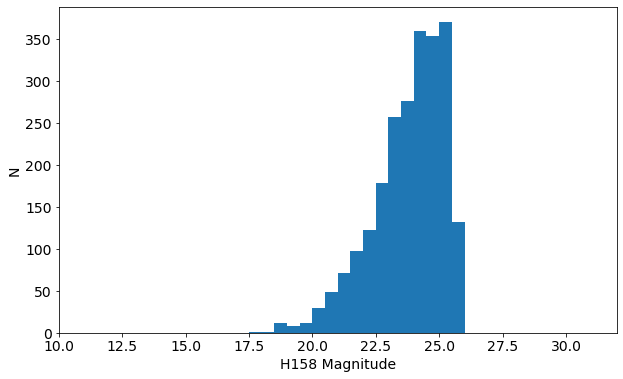

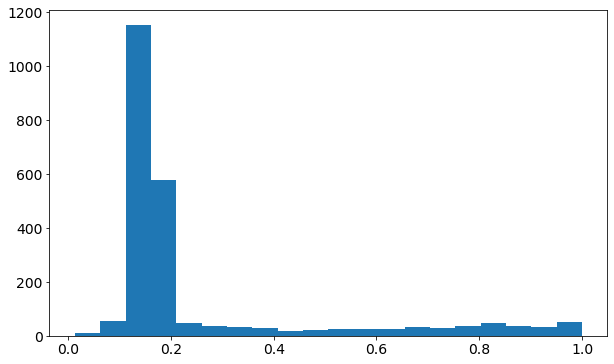

In [10]:
#all_match_tbl,all_match_clean_tbl = build_all_tables(verb=1)
#all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss", verb=1,
#                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")                                                      
#all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss_single", prefix="hlss", verb=1,
#                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")
all_match_tbl,all_match_clean_tbl = build_roll_tables(root="hlss_single_v5", prefix="hlss", verb=1,
                                                      LOCAL_PATH="/home/gwalth/data/Roman/grizli/sims")

In [11]:
print(type(all_match_tbl))
print(type(all_match_clean_tbl))

<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>


In [ ]:
#all_match_tbl = vstack(all_match_tables)
#all_match_clean_tbl = vstack(all_match_clean_tables)

In [ ]:
#print(os.getcwd())
#os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))
#print(os.getcwd())

### Write tables

In [12]:
all_match_tbl.write("hlss_single_match.fits")
all_match_clean_tbl.write("hlss_single_match_clean.fits")

2023-01-13 08:39:27,007 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'FILTER_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2023-01-13 08:39:27,009 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'THRESHOLD' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2023-01-13 08:39:27,013 - stpipe - WARNING - /home/gwalth/python/miniconda3/envs/grizli39/lib/python3.9/site-packages/astropy/io/fits/card.py:264: VerifyWarning: Keyword name 'BACK_PIXEL_SCALE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(

2023-01-13 08:39:27

### Load tables

In [12]:
#from astropy.table import Table
all_match_tbl = Table.read("hlss_single_match.fits")
all_match_clean_tbl = Table.read("hlss_single_match_clean.fits")

In [11]:
print(all_match_tbl)

 id         thresh        npix tnpix ... modimage        flux_Ha               flux_OIII                 d2d          
                                     ...                                                                 deg          
---- -------------------- ---- ----- ... -------- ---------------------- ---------------------- ----------------------
   1 0.061696410179138184   28    24 ...        0  7.044297774337953e-20  3.202972457097668e-20  0.0025122799479512783
   1 0.061696410179138184   28    24 ...        0 1.0067106696351567e-19 4.9119672399798644e-20  0.0019167889802371358
   1 0.061696410179138184   28    24 ...        0  7.505279207248644e-20  3.638469748694988e-20    0.00120769662777312
   1 0.061696410179138184   28    24 ...        0  7.310115579164477e-18   9.45396479391326e-19 3.5011233612617905e-05
   1 0.061696410179138184   28    24 ...        0  8.389765819875277e-19  7.059582997442783e-19  0.0013723014718427123
   1 0.061696410179138184   28    24 ...        

In [13]:
print(all_match_tbl['FLUX001'])

      FLUX001       
--------------------
2.31148902416234e-17
2.31148902416234e-17
2.31148902416234e-17
2.31148902416234e-17
2.31148902416234e-17
2.31148902416234e-17
                 ...
1.36690055886574e-16
7.98629842238069e-16
7.98629842238069e-16
7.98629842238069e-16
7.98629842238069e-16
7.98629842238069e-16
7.98629842238069e-16
Length = 13260 rows


In [14]:
print(all_match_clean_tbl)

 id         thresh        ...       flux_OIII                 d2d          
                          ...                                 deg          
---- -------------------- ... ---------------------- ----------------------
   1    0.061708714812994 ...   9.45396479391326e-19 3.6815720281245366e-05
   3  0.06134103238582611 ... 1.1230708914545274e-17  3.827659384527419e-05
   3  0.06134103238582611 ...  5.679408138647068e-18  3.668144877105344e-05
   4   0.0613999143242836 ... 2.4978527164519793e-17   9.93855442044339e-05
   5 0.061759255826473236 ...  7.039005208527849e-17 4.3201814851517684e-05
   7 0.061779532581567764 ...  6.529383839619079e-19  4.374882730204785e-05
 ...                  ... ...                    ...                    ...
2320 0.061459075659513474 ...  6.841897209721084e-20 3.8677433850083784e-05
2321 0.061810001730918884 ... 2.6602272411474608e-18  3.835170098773377e-05
2322  0.06125323101878166 ...  9.882897224115849e-21  4.218367417442656e-05
2324 0.06181

In [15]:
print(all_match_tbl.colnames)
print(len(all_match_tbl.colnames))

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

In [16]:
print(all_match_clean_tbl.colnames)
print(len(all_match_clean_tbl.colnames))

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

### Description of tables

The available tables for analysis:

| Tables      | Description |
| :--- | :--- |
| phot          | SExtractor table |
| Roman         | Grizli data |
| Roman_all     | output of check_sims, all sources |
| Roman_magcut  | output of check_sims, only sources above the magnitude cut |
| Roman_extract | output of check_sims, only sources extracted |
| redshift_fits | all the redshift fits of the Roman_extract (full.fits) read into a table |
| primer        | original input sources and true redshifts |


Roman_extract, redshift_fits and primer need to be joined into one table

Roman_extract and redshift_fits can be joined based on SExtractor id --> all_tbl
primer needs to be joined based on RA,Dec  

| Tables      | Description |
| :--- | :--- |
| all_tbl         | join between Roman_extract and redshift_fits |
| match_tbl       | join between all_tbl and primer |
| match_clean_tbl | sources outside of match radius removed (>0.4") |

1944
909
660


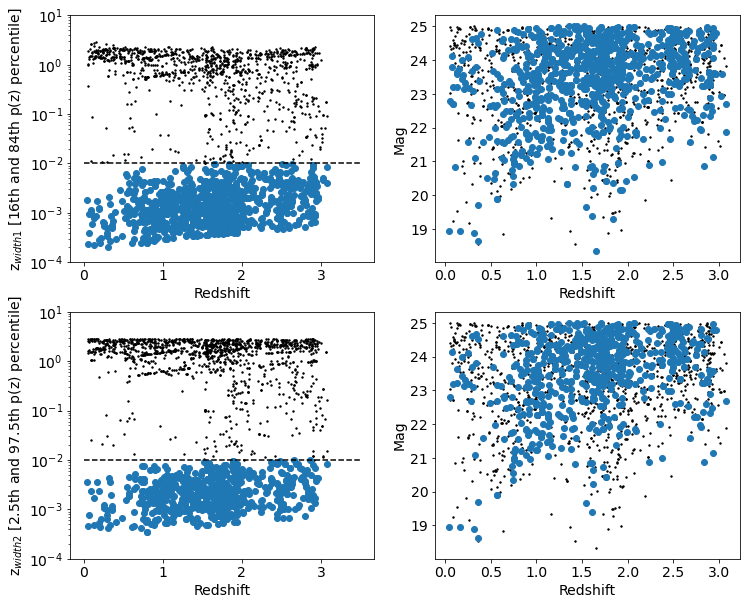

In [17]:
#plot_redshifts(all_tbl)
zfilt1,zfilt2 = plot_redshifts2(all_match_clean_tbl)

In [18]:
#z_fit = all_match_clean_tbl["REDSHIFT_1"]
#z_true = all_match_clean_tbl["REDSHIFT_2"]
z_fit = all_match_clean_tbl["REDSHIFT"]
z_true = all_match_clean_tbl["z_true"]

mag_fit  = all_match_clean_tbl["mag_auto"]
#mag_true = all_match_clean_tbl["MAG_F1600W"]
#mag_true = all_match_clean_tbl["m"]
mag_true = all_match_clean_tbl["m_new"]

filt = all_match_clean_tbl["mag_auto"] < 24

Text(0.5, 0, 'Magnitude')

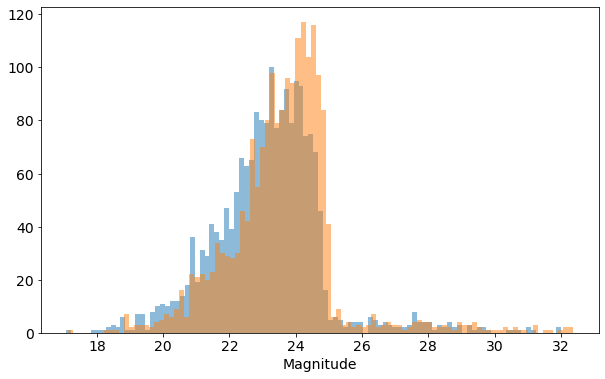

In [19]:
fig = plt.figure()
p1 = fig.add_subplot(111)
p1.hist(all_match_clean_tbl["m"],bins=100, alpha=0.5)
p1.hist(all_match_clean_tbl["m_new"],bins=100, alpha=0.5)
p1.set_xlabel("Magnitude")

Text(0.5, 0, 'True redshift')

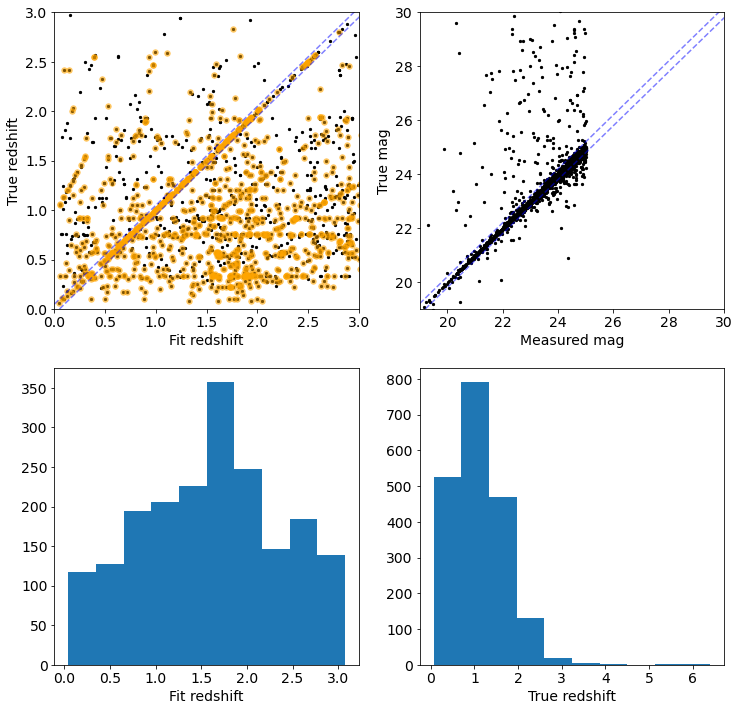

In [20]:
fig = plt.figure(figsize=(12,12))

p1 = fig.add_subplot(221)
p1.scatter(z_fit, z_true, s=5, c="k")
p1.scatter(z_fit[filt], z_true[filt], s=30, c="orange",alpha=0.5)
p1.plot([0.05,3.05],[0.0,3.0],"--",c="b",alpha=0.5)
p1.plot([0.0,3.0],[0.05,3.05],"--",c="b",alpha=0.5)
p1.set_xlim(0,3)
p1.set_ylim(0,3)
p1.set_xlabel("Fit redshift")
p1.set_ylabel("True redshift")

p2 = fig.add_subplot(222)
p2.scatter(mag_fit, mag_true, s=5, c="k")
p2.plot([19.2,30.2],[19,30],"--",c="b",alpha=0.5)
p2.plot([19,30],[19.2,30.2],"--",c="b",alpha=0.5)
p2.set_xlim(19,30)
p2.set_ylim(19,30)
p2.set_xlabel("Measured mag")
p2.set_ylabel("True mag")

p3 = fig.add_subplot(223)
p3.hist(z_fit)
p3.set_xlabel("Fit redshift")

p4 = fig.add_subplot(224)
p4.hist(z_true)
p4.set_xlabel("True redshift")

Text(0.5, 0, 'True redshift')

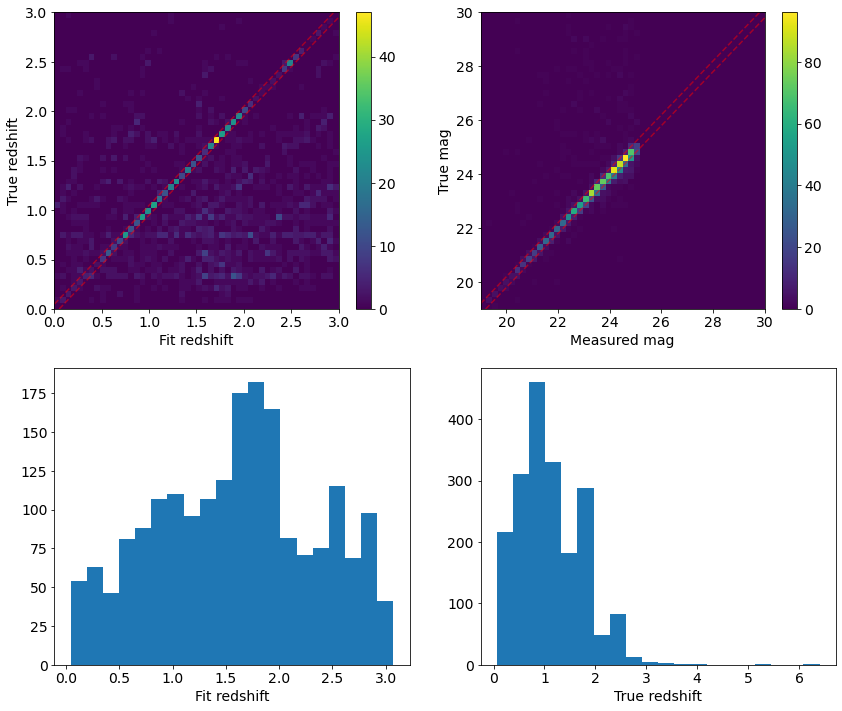

In [21]:
fig = plt.figure(figsize=(14,12))

p1 = fig.add_subplot(221)
#p1.scatter(z_fit, z_true, s=5, c="k")
#p1.scatter(z_fit[filt], z_true[filt], s=30, c="orange",alpha=0.5)
#im1 = p1.hist2d(z_fit,z_true,bins=(60,60))
im1 = p1.hist2d(z_fit, z_true, range=[[0,3],[0,3]], bins=(50,50))
p1.plot([0.05,3.05],[0.0,3.0],"--",c="r",alpha=0.5)
p1.plot([0.0,3.0],[0.05,3.05],"--",c="r",alpha=0.5)
#p1.set_xlim(0,3)
#p1.set_ylim(0,3)
p1.set_xlabel("Fit redshift")
p1.set_ylabel("True redshift")

cb1 = fig.colorbar(im1[3])

p2 = fig.add_subplot(222)
#p2.scatter(mag_fit, mag_true, s=5, c="k")
#im2 = p2.hist2d(mag_fit, mag_true, bins=(55,55))
im2 = p2.hist2d(mag_fit, mag_true, range=[[19,30],[19,30]], bins=(50,50))
p2.plot([19.2,30.2],[19,30],"--",c="r",alpha=0.5)
p2.plot([19,30],[19.2,30.2],"--",c="r",alpha=0.5)
#p2.set_xlim(19,30)
#p2.set_ylim(19,30)
p2.set_xlabel("Measured mag")
p2.set_ylabel("True mag")

cb2 = fig.colorbar(im2[3])

p3 = fig.add_subplot(223)
p3.hist(z_fit,bins=20)
p3.set_xlabel("Fit redshift")

p4 = fig.add_subplot(224)
p4.hist(z_true,bins=20)
p4.set_xlabel("True redshift")

Text(0.5, 0, 'dz')

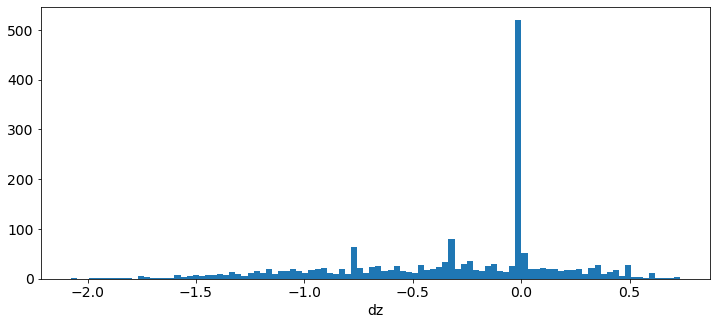

In [22]:
dz = (z_true - z_fit)/(1+z_true)

fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(111)
p1.hist(dz,bins=100)

#p1.hist(dz,bins=1000)
#p1.set_xlim(-0.02,0.02)

p1.set_xlabel("dz")

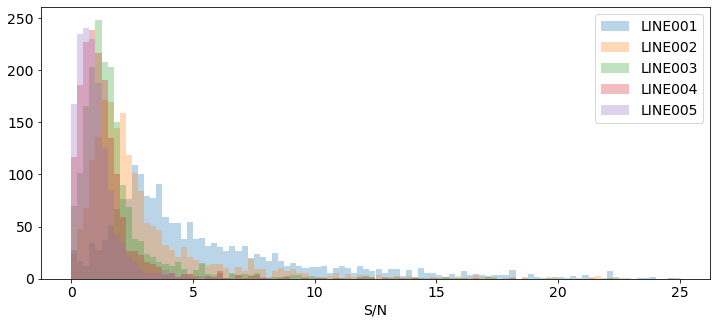

In [23]:
all_match_clean_tbl['SN001'] = all_match_clean_tbl['FLUX001']/all_match_clean_tbl['ERR001']
all_match_clean_tbl['SN002'] = all_match_clean_tbl['FLUX002']/all_match_clean_tbl['ERR002']
all_match_clean_tbl['SN003'] = all_match_clean_tbl['FLUX003']/all_match_clean_tbl['ERR003']
all_match_clean_tbl['SN004'] = all_match_clean_tbl['FLUX004']/all_match_clean_tbl['ERR004']
all_match_clean_tbl['SN005'] = all_match_clean_tbl['FLUX005']/all_match_clean_tbl['ERR005']

fig = plt.figure(figsize=(12,5))
p1 = fig.add_subplot(111)
p1.hist(all_match_clean_tbl['SN001'],bins=100,range=[0,25],label="LINE001",alpha=0.3)
p1.hist(all_match_clean_tbl['SN002'],bins=100,range=[0,25],label="LINE002",alpha=0.3)
p1.hist(all_match_clean_tbl['SN003'],bins=100,range=[0,25],label="LINE003",alpha=0.3)
p1.hist(all_match_clean_tbl['SN004'],bins=100,range=[0,25],label="LINE004",alpha=0.3)
p1.hist(all_match_clean_tbl['SN005'],bins=100,range=[0,25],label="LINE005",alpha=0.3)
p1.set_xlabel("S/N")
#p1.set_xlim(0,25)
p1.legend()

In [24]:
filt1 = all_match_clean_tbl['SN001'] > 6.5
print("Num. sources (S/N > 6.5) =",len(all_match_clean_tbl['SN001'][filt1]))

all_match_clean_sn65_tbl = all_match_clean_tbl[filt1]
print("Num. sources w/ 2 lines (S/N > 3)")
filt2 = all_match_clean_sn65_tbl['SN002'] > 3
print(len(all_match_clean_sn65_tbl[filt2]))

print("Num. sources w/ 3 lines (S/N > 3)")
filt3 = all_match_clean_sn65_tbl['SN003'] > 3
print(len(all_match_clean_sn65_tbl[filt3]))



Num. sources (S/N > 6.5) = 599
Num. sources w/ 2 lines (S/N > 3)
314
Num. sources w/ 3 lines (S/N > 3)
165


In [27]:
def sample_numbers4(tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, bin_size=0.1, zmin=0, zmax=6,
                    alpha=1.0, weights=None, full_output=0, label = "all", label_dz = "z < 0.005",
                    ax=""):

    print('All sources =',len(tbl[sn_key]))

    filt = (tbl[sn_key] > sn) & (tbl["REDSHIFT"] >= zmin) & (tbl["REDSHIFT"] <= zmax)
    
    print()
    print('Num. sources (S/N > %.1f, %.1f < z < %.1f) =' % (sn,zmin,zmax),len(tbl[sn_key][filt]))

    z_fit = tbl["REDSHIFT"][filt] # sn and z filtered
    z_true = tbl["z_true"][filt]
    
    dz = (z_true - z_fit)/(1+z_true)

    dz_filt = np.abs(dz) < sigma_dz*(1+z_true)

    tbl_sn_z = tbl[filt]
    tbl_sn_z_dz = tbl_sn_z[dz_filt]
    
    print("Num. sources (dz < %.3f) =" % (sigma_dz),len(z_fit[dz_filt]))
    #print("Frac. sources (dz < %.3f) = %.4f" % (sigma_dz,len(z_fit[dzfilt])/len(z_fit)))
    print()

    bins = int((zmax-zmin)/bin_size)
    print(bins)

    plt_show = 0
    if not ax:
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        plt_show = 1


    hist, bin_edges = np.histogram(z_fit, bins=bins, range=(zmin,zmax))

    hist_dz, bin_edges_dz = np.histogram(z_fit[dz_filt], bins=bins, range=(zmin,zmax))

    bin_mid = [(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges[:-1]))]
    bin_mid_dz = [(bin_edges_dz[i]+bin_edges_dz[i+1])/2. for i in range(len(bin_edges_dz[:-1]))]


    #ax.bar(bin_edges[:-1], hist, align="edge", width=bin_size)
    #ax.bar(bin_edges_dz[:-1], hist_dz, align="edge", width=bin_size)

    #ax.bar(bin_edges_dz[:-1], hist_dz/hist, align="edge", width=bin_size)
    ax.plot(bin_mid_dz, hist_dz/hist, drawstyle="steps-mid",c="orange")
    #ax.plot(bin_edges_dz[:-1], hist_dz/hist, drawstyle="steps-pre",c="g")
    #ax.plot(bin_edges_dz[:-1], hist_dz/hist, drawstyle="steps-post",c="y")
    #ax.plot(bin_edges_dz[:-1], hist_dz/hist, drawstyle="steps-mid",c="r")

    print(hist)
    print(hist_dz)
    print(hist_dz/hist)
    print(bin_edges)
    print(bin_edges_dz)
    print(np.sum(hist))
    print(np.sum(hist_dz))

    ax.plot([zmin,zmax],[0.5,0.5],"--",lw=0.5,c="k")
    ax.plot([zmin,zmax],[0.9,0.9],"-.",lw=0.5,c="k")


    ax.set_xlabel("Redshift z")
    ax.set_ylabel("Frac")

    ax.set_ylim(0,1.1)
    ax.set_xlim(zmin,zmax)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(bin_size))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    #ax.legend()

    if plt_show:
        plt.show()

    return tbl_sn_z, tbl_sn_z[dz_filt], (filt, dz_filt)

All sources = 1944

Num. sources (S/N > 6.5, 0.0 < z < 3.0) = 599
Num. sources (dz < 0.005) = 297

30
[ 7  8  7  9  1  8 13 25 22 34 33 29 29 28 26 24 45 63 32 29 15  8 12 12
 20 17 10 10 16  7]
[ 0  0  0  4  0  5  5 18 14 21 19 18 17 18 13  7 20 42 19 17  6  2  1  2
 16  8  1  1  3  0]
[0.         0.         0.         0.44444444 0.         0.625
 0.38461538 0.72       0.63636364 0.61764706 0.57575758 0.62068966
 0.5862069  0.64285714 0.5        0.29166667 0.44444444 0.66666667
 0.59375    0.5862069  0.4        0.25       0.08333333 0.16666667
 0.8        0.47058824 0.1        0.1        0.1875     0.        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
599
297


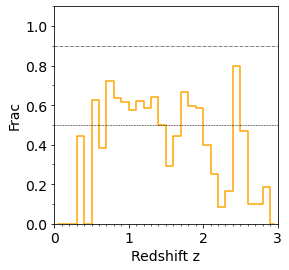

599
297
1944
599


In [30]:
sample_info1 = sample_numbers4(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3)

all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts  = sample_info1
all_filt, all_dz_filt = filts

print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_dz005_tbl))
print(len(all_filt))      # SN and z filt
print(len(all_dz_filt))   # dz filt

30
All sources = 1944

Num. sources (S/N > 6.5, 0.0 < z < 3.0) = 599
Num. sources (dz < 0.005) = 297

30
[ 7  8  7  9  1  8 13 25 22 34 33 29 29 28 26 24 45 63 32 29 15  8 12 12
 20 17 10 10 16  7]
[ 0  0  0  4  0  5  5 18 14 21 19 18 17 18 13  7 20 42 19 17  6  2  1  2
 16  8  1  1  3  0]
[0.         0.         0.         0.44444444 0.         0.625
 0.38461538 0.72       0.63636364 0.61764706 0.57575758 0.62068966
 0.5862069  0.64285714 0.5        0.29166667 0.44444444 0.66666667
 0.59375    0.5862069  0.4        0.25       0.08333333 0.16666667
 0.8        0.47058824 0.1        0.1        0.1875     0.        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
599
297


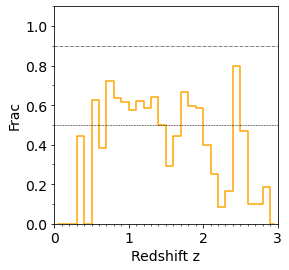

599
297
1944
599
599
302

First histogram here:
[ 7.  8.  7.  5.  1.  3.  8.  7.  8. 13. 14. 11. 12. 10. 13. 17. 25. 21.
 13. 12.  9.  6. 11. 10.  4.  9.  9.  9. 13.  7.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
302.0
Second histogram here:
[ 0.  0.  0.  4.  0.  5.  5. 18. 14. 21. 19. 18. 17. 18. 13.  7. 20. 42.
 19. 17.  6.  2.  1.  2. 16.  8.  1.  1.  3.  0.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
297.0

All sources = 1944

Num. sources (S/N > 6.5, 0.0 < z < 3.0) = 599
Num. sources (dz < 0.005) = 297

30
[ 7  8  7  9  1  8 13 25 22 34 33 29 29 28 26 24 45 63 32 29 15  8 12 12
 20 17 10 10 16  7]
[ 0  0  0  4  0  5  5 18 14 21 19 18 17 18 13  7 20 42 19 17  6  2  1  2
 16  8  1  1  3  0]
[0.         0.         0.         0.44444444 0.         0.625
 0.38461538 0.72       0.63636364 0.61764706 0.57575758 0.62068966

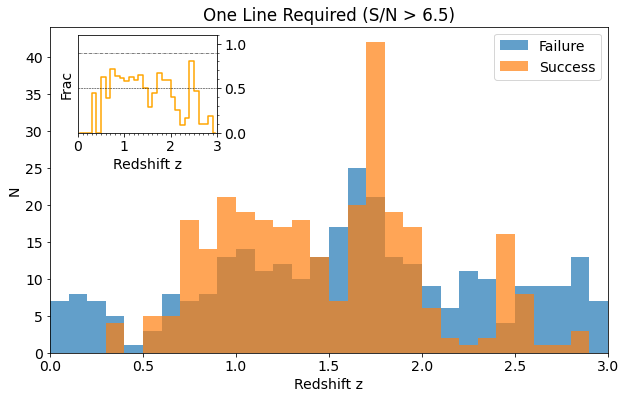

In [31]:
zmin = 0.0
zmax = 3.0
#zmax = 3.0

zinc = 0.1
bins = int((zmax-zmin)/zinc)
print(bins)

#######################

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sample_info1 = sample_numbers4(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3)

all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts  = sample_info1
all_sn65_filt, all_sn65_dz_filt = filts

print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_dz005_tbl))
print(len(all_filt))      # SN and z filt
print(len(all_dz_filt))   # dz filt

all_sn65_dz_not_filt = np.logical_not(all_sn65_dz_filt)
all_match_clean_sn65_not_tbl = all_match_clean_sn65_tbl[all_sn65_dz_not_filt]
print(len(all_match_clean_sn65_tbl))
print(len(all_match_clean_sn65_not_tbl))
print()


fig = plt.figure(figsize=(10,6))

p = fig.add_subplot(111)
print("First histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_not_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Failure")
#n,nbins,patches = p.hist(all_match_clean_sn65_tbl["REDSHIFT"],
#       range=(zmin,zmax), bins=bins, alpha=0.7, label="All")
print(n,nbins)
print(np.sum(n))

print("Second histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_dz005_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Success")
print(n,nbins)
print(np.sum(n))

#p.legend()

p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(zmin,zmax)
p.set_title("One Line Required (S/N > 6.5)")
#p.set_ylim(0,30)
p.xaxis.set_major_locator(MultipleLocator(0.5))

p.legend()

# Create inset in data coordinates using ax.transData as transform
ax_ins = inset_axes(p, width="100%", height="100%",
                    #bbox_to_anchor=(0.68, 0.48, 0.25, 0.3),
                    bbox_to_anchor=(0.05, 0.675, 0.25, 0.3),
                    bbox_transform=p.transAxes, borderpad=0)

ax_ins.tick_params(which='both',left=False, right=True, labelleft=False, labelright=True)

print()
sample_info1 = sample_numbers4(all_match_clean_tbl, sn_key='SN001', sn=6.5, sigma_dz=0.005, 
                               alpha=0.7, bin_size=zinc, zmin=zmin, zmax=zmax, ax=ax_ins)
    

#all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts = sample_info1
#all_filt, all_dz_filt = filts

#print(len(all_match_clean_sn65_tbl))
#print(len(all_match_clean_sn65_dz005_tbl))
#print(len(all_filt))      # SN and z filt
#print(len(all_dz_filt))   # dz filt

plt.show()

30
All sources = 599

Num. sources (S/N > 3.0, 0.0 < z < 3.0) = 314
Num. sources (dz < 0.005) = 213

30
[ 4  2  1  5  1  4  7 11  9 16 16 12  8  8 12 17 24 48 23 19 10  4  7  4
 17 10  1  2  9  3]
[ 0  0  0  3  0  4  5 11  9 14  8  8  8  6  8  6 13 37 18 16  5  2  1  2
 16  8  1  1  3  0]
[0.         0.         0.         0.6        0.         1.
 0.71428571 1.         1.         0.875      0.5        0.66666667
 1.         0.75       0.66666667 0.35294118 0.54166667 0.77083333
 0.7826087  0.84210526 0.5        0.5        0.14285714 0.5
 0.94117647 0.8        1.         0.5        0.33333333 0.        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
314
213


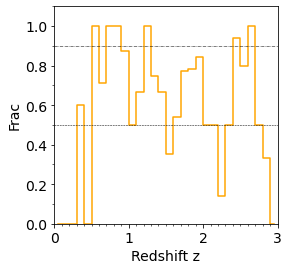

314
213
1944
599

314
101

First histogram here:
[ 4.  2.  1.  2.  1.  0.  2.  0.  0.  2.  8.  4.  0.  2.  4. 11. 11. 11.
  5.  3.  5.  2.  6.  2.  1.  2.  0.  1.  6.  3.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
101.0
Second histogram here:
[ 0.  0.  0.  3.  0.  4.  5. 11.  9. 14.  8.  8.  8.  6.  8.  6. 13. 37.
 18. 16.  5.  2.  1.  2. 16.  8.  1.  1.  3.  0.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
213.0

All sources = 599

Num. sources (S/N > 3.0, 0.0 < z < 3.0) = 314
Num. sources (dz < 0.005) = 213

30
[ 4  2  1  5  1  4  7 11  9 16 16 12  8  8 12 17 24 48 23 19 10  4  7  4
 17 10  1  2  9  3]
[ 0  0  0  3  0  4  5 11  9 14  8  8  8  6  8  6 13 37 18 16  5  2  1  2
 16  8  1  1  3  0]
[0.         0.         0.         0.6        0.         1.
 0.71428571 1.         1.         0.875      0.5        0.66666667
 1

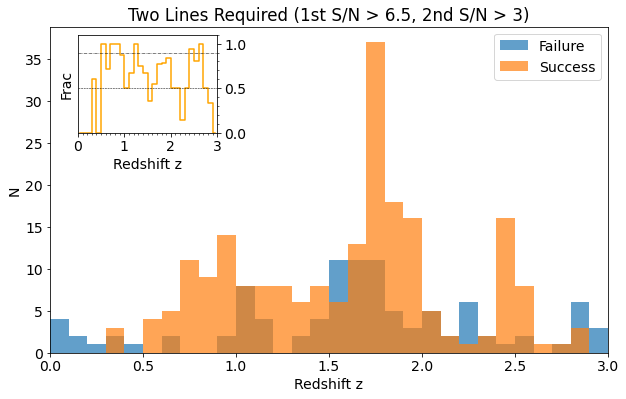

In [32]:
zmin = 0.0
zmax = 3.0
#zmax = 3.0

zinc = 0.1
bins = int((zmax-zmin)/zinc)
print(bins)

#######################

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sample_info1 = sample_numbers4(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, 
                               alpha=0.7, bin_size=0.1, zmin=0, zmax=3)

all_match_clean_sn65_sn3_tbl, all_match_clean_sn65_sn3_dz005_tbl, filts  = sample_info1
all_sn3_filt, all_sn3_dz_filt = filts

print(len(all_match_clean_sn65_sn3_tbl))
print(len(all_match_clean_sn65_sn3_dz005_tbl))
print(len(all_filt))      # SN and z filt
print(len(all_dz_filt))   # dz filt
print()

all_sn3_dz_not_filt = np.logical_not(all_sn3_dz_filt)
all_match_clean_sn65_sn3_not_tbl = all_match_clean_sn65_sn3_tbl[all_sn3_dz_not_filt]
print(len(all_match_clean_sn65_sn3_tbl))
print(len(all_match_clean_sn65_sn3_not_tbl))
print()


fig = plt.figure(figsize=(10,6))

p = fig.add_subplot(111)
print("First histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_sn3_not_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Failure")
#n,nbins,patches = p.hist(all_match_clean_sn65_tbl["REDSHIFT"],
#       range=(zmin,zmax), bins=bins, alpha=0.7, label="All")
print(n,nbins)
print(np.sum(n))

print("Second histogram here:")
n,nbins,patches = p.hist(all_match_clean_sn65_sn3_dz005_tbl["REDSHIFT"],
       range=(zmin,zmax), bins=bins, alpha=0.7, label="Success")
print(n,nbins)
print(np.sum(n))

#p.legend()

p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(zmin,zmax)
p.set_title("Two Lines Required (1st S/N > 6.5, 2nd S/N > 3)")
#p.set_ylim(0,30)
p.xaxis.set_major_locator(MultipleLocator(0.5))

p.legend()

# Create inset in data coordinates using ax.transData as transform
ax_ins = inset_axes(p, width="100%", height="100%",
                    #bbox_to_anchor=(0.68, 0.48, 0.25, 0.3),
                    bbox_to_anchor=(0.05, 0.675, 0.25, 0.3),
                    bbox_transform=p.transAxes, borderpad=0)

ax_ins.tick_params(which='both',left=False, right=True, labelleft=False, labelright=True)

print()
sample_info1 = sample_numbers4(all_match_clean_sn65_tbl, sn_key='SN002', sn=3.0, sigma_dz=0.005, 
                               alpha=0.7, bin_size=zinc, zmin=zmin, zmax=zmax, ax=ax_ins)
    
#all_match_clean_sn65_tbl, all_match_clean_sn65_dz005_tbl, filts = sample_info1
#all_filt, all_dz_filt = filts

#print(len(all_match_clean_sn65_tbl))
#print(len(all_match_clean_sn65_dz005_tbl))
#print(len(all_filt))      # SN and z filt
#print(len(all_dz_filt))   # dz filt

plt.show()

Text(0.5, 0, 'dz')

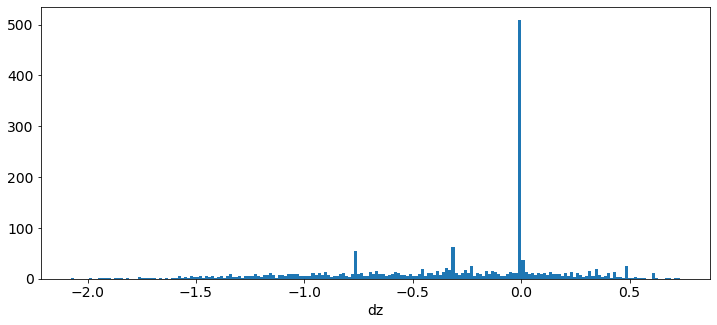

In [33]:
fig = plt.figure(figsize=(12,5))

p1 = fig.add_subplot(111)
#p1.hist(dz,bins=100)

p1.hist(dz,bins=200)
#p1.set_xlim(-0.02,0.02)

p1.set_xlabel("dz")

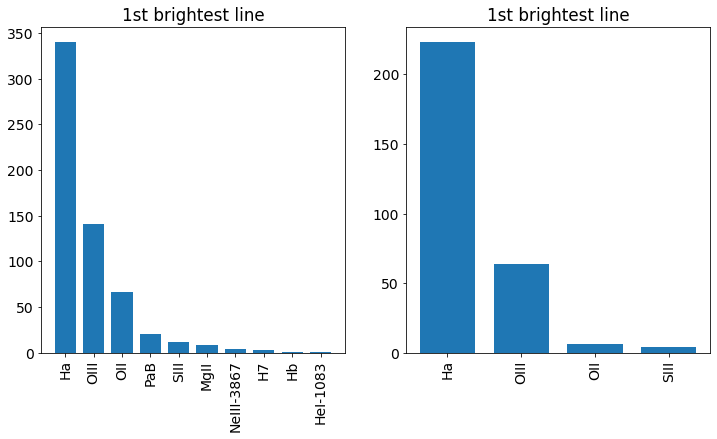

In [34]:
# Everything that it thinks has a line
#emline_bar_chart2(all_match_clean_tbl['LINE001'],all_match_clean_sn65_dz005_tbl['LINE001'], 
#                  title = "1st brightest line")

# Everything that has a line S/N > 6.5
emline_bar_chart2(all_match_clean_sn65_tbl['LINE001'],all_match_clean_sn65_dz005_tbl['LINE001'], 
                  title = "1st brightest line")

#emline_bar_chart(all_match_clean_tbl['LINE001'],title = "1st brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE002'],title = "2nd brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE003'],title = "3rd brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE004'],title = "4th brightest line")
#emline_bar_chart(all_match_clean_tbl['LINE005'],title = "5th brightest line")

In [35]:
print("All sources")
print(len(all_match_tbl))
print()

print("Sources matched with a radius <0.4")
#clean_filt
all_match_clean_tbl
print(len(all_match_clean_tbl))

#all_clean_not_filt = np.logical_not(all_clean_filt)
#all_match_clean_not_tbl = all_match_tbl[all_clean_not_filt]
#print(len(all_match_clean_not_tbl))
print()

print("Sources with line S/N > 6.5")
all_sn65_filt
all_match_clean_sn65_tbl
print(len(all_match_clean_sn65_tbl))

all_sn65_not_filt = np.logical_not(all_sn65_filt)
all_match_clean_sn65_not_tbl = all_match_clean_tbl[all_sn65_not_filt]
print(len(all_match_clean_sn65_not_tbl))
print()

print("Sources with line S/N > 6.5 within z < 0.005*(1+z)")
all_sn65_dz005_filt
all_match_clean_sn65_dz005_tbl
print(len(all_match_clean_sn65_dz005_tbl))

all_sn65_dz005_not_filt = np.logical_not(all_sn65_dz005_filt)
all_match_clean_sn65_dz005_not_tbl = all_match_clean_sn65_tbl[all_sn65_dz005_not_filt]
print(len(all_match_clean_sn65_dz005_not_tbl))

All sources
13260

Sources matched with a radius <0.4
1944

Sources with line S/N > 6.5
599
1345

Sources with line S/N > 6.5 within z < 0.005*(1+z)
297
302


In [ ]:
print(os.getcwd())

In [ ]:
#all_match_tbl.write("match.fits")
#all_match_clean_tbl.write("match_clean.fits") # on the order of MB 

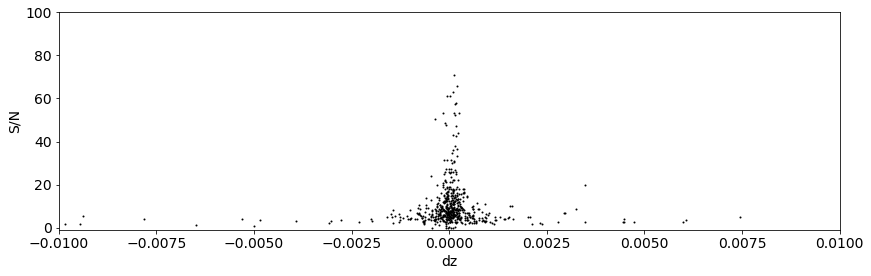

In [36]:
sn_dz_plot(all_match_clean_tbl)

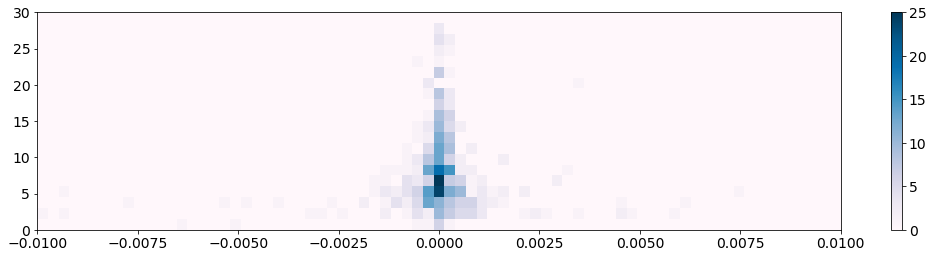

In [37]:
sn_dz_hist2d_plot(all_match_clean_tbl)

In [38]:
#print(all_match_clean_tbl['id'])
#print(all_match_clean_sn65_tbl['id'])
print(all_match_clean_sn65_dz005_tbl['id'])

 id 
----
  21
  30
  39
  47
  52
  54
 ...
2280
2282
2286
2292
2305
2311
2313
Length = 297 rows


In [39]:
#print(all_match_clean_not_tbl['id'])
#print(all_match_clean_sn65_not_tbl['id'])
print(all_match_clean_sn65_dz005_not_tbl['id'])

 id 
----
   3
   3
   4
   5
  13
  80
 ...
2284
2284
2306
2309
2310
2312
2325
Length = 302 rows


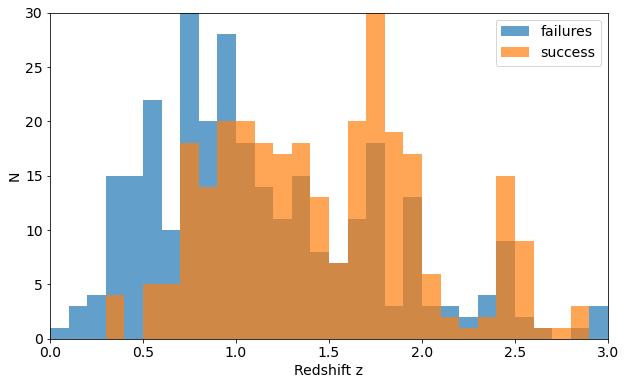

In [40]:
fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['REDSHIFT_2'],
#       range=(0,3), bins=30, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['z_true'],
       range=(0,3), bins=30, alpha=0.7, label="success")
p.set_xlabel("Redshift z")
p.set_ylabel("N")
p.set_xlim(0,3)
p.set_ylim(0,30)
p.legend()

(0.0, 20.0)

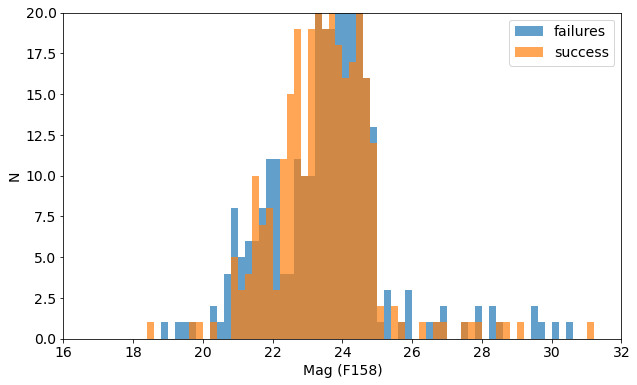

In [41]:
fig = plt.figure(figsize=(10,6))
p = fig.add_subplot(111)
#p.hist(all_match_clean_sn65_dz005_not_tbl['MAG_F1600W'],
#       range=(16,32), bins=16*5, alpha=0.7, label="failures")
#p.hist(all_match_clean_sn65_dz005_tbl['MAG_F1600W'],
#       range=(16,32), bins=16*5, alpha=0.7, label="matches")
p.hist(all_match_clean_sn65_dz005_not_tbl['m_new'],
       range=(16,32), bins=16*5, alpha=0.7, label="failures")
p.hist(all_match_clean_sn65_dz005_tbl['m_new'],
       range=(16,32), bins=16*5, alpha=0.7, label="success")
p.legend()
p.set_xlabel("Mag (F158)")
p.set_ylabel("N")
p.set_xlim(16,32)
p.set_ylim(0,20)

In [42]:
mag_cut = 24

print("All sources")
print(len(all_match_tbl))
filt = all_match_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_tbl[filt]))
print()

print("Sources matched with a search radius <0.4")
#clean_filt
#all_match_clean_tbl
print(len(all_match_clean_tbl))
filt = all_match_clean_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_tbl[filt]))
print()

print("Sources with line S/N > 6.5")
print(len(all_match_clean_sn65_tbl))
filt = all_match_clean_sn65_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_sn65_tbl[filt]))
print()

#print(len(all_match_clean_sn65_not_tbl))
#filt = all_match_clean_sn65_not_tbl['MAG_AUTO'] < mag_cut
#print(len(all_match_clean_sn65_not_tbl[filt]))
#print()

print("Sources with line S/N > 6.5 within z < 0.005*(1+z)")
print(len(all_match_clean_sn65_dz005_tbl))
filt = all_match_clean_sn65_dz005_tbl['mag_auto'] < mag_cut
print("Sources m < %i" % (mag_cut))
print(len(all_match_clean_sn65_dz005_tbl[filt]))
print()

#print(len(all_match_clean_sn65_dz005_not_tbl))
#filt = all_match_clean_sn65_dz005_not_tbl['MAG_AUTO'] < mag_cut
#print(len(all_match_clean_sn65_dz005_not_tbl[filt]))
#print()

All sources
13260
Sources m < 24
8221

Sources matched with a search radius <0.4
1944
Sources m < 24
1189

Sources with line S/N > 6.5
599
Sources m < 24
411

Sources with line S/N > 6.5 within z < 0.005*(1+z)
297
Sources m < 24
210



In [44]:
print(os.getcwd())
os.chdir(os.path.join(LOCAL_PATH, root, 'Extractions'))
print(os.getcwd())

/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Extractions
/home/gwalth/data/Roman/grizli/sims/hlss_single_v5/Extractions


In [45]:
print(all_match_clean_sn65_dz005_tbl.colnames)

['id', 'thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2_image', 'y2_image', 'xy_image', 'errx2', 'erry2', 'errxy', 'a_image', 'b_image', 'theta_image', 'cxx_image', 'cyy_image', 'cxy_image', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag', 'x_image', 'y_image', 'number', 'ra', 'dec', 'x_world', 'y_world', 'flux_iso', 'fluxerr_iso', 'area_iso', 'mag_iso', 'kron_radius', 'kron_rcirc', 'flux_auto', 'fluxerr_auto', 'bkg_auto', 'flag_auto', 'area_auto', 'flux_radius_flag', 'flux_radius_20', 'flux_radius', 'flux_radius_90', 'tot_corr', 'mag_auto', 'magerr_auto', 'flux_aper_0', 'fluxerr_aper_0', 'flag_aper_0', 'bkg_aper_0', 'mask_aper_0', 'flux_aper_1', 'fluxerr_aper_1', 'flag_aper_1', 'bkg_aper_1', 'mask_aper_1', 'flux_aper_2', 'fluxerr_aper_2', 'flag_aper_2', 'bkg_aper_2', 'mask_aper_2', 'flux_aper_3', 'fluxerr_aper_3', 'flag_aper_3', 'bkg_aper_3', 'mask_aper_3', 'flux_aper_4', 'fluxerr_aper_4', 'flag_aper_4', 'bkg_aper_4', 'mask_aper_4

In [58]:
r0,d0 = 9.170514, -0.848475 # 20.97  Ha (good!!!)

dr = np.sqrt((all_match_tbl['ra']-r0)**2*np.cos(d0/180*np.pi)**2 + 
             (all_match_tbl['dec']-d0)**2)*3600.
id = all_match_tbl['number'][np.argmin(dr)]
obj_mag = all_match_tbl['mag_auto'][np.argmin(dr)]
print('ID:%d, mag=%.2f, dr=%.2f"' %(id, obj_mag, np.min(dr)))

ID:461, mag=23.62, dr=0.00"


In [56]:
tbl = all_match_clean_sn65_dz005_tbl

filt = (tbl["REDSHIFT"] > 2.1) & (tbl["REDSHIFT"] < 2.3)
#filt = (tbl["REDSHIFT"] > 2.0) & (tbl["REDSHIFT"] < 2.5)

tbl['ra'].info.format = '.6f'
tbl['dec'].info.format = '.6f'

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002"]:
    tbl[col].info.format = '.3f'
    
print(tbl['ra','dec','id','z_true','mag_auto',"REDSHIFT","LINE001","SN001","LINE002","SN002"][filt])

   ra       dec     id  z_true mag_auto REDSHIFT LINE001 SN001  LINE002 SN002 
  deg       deg                  uJy                                          
-------- --------- ---- ------ -------- -------- ------- ------ ------- ------
9.170514 -0.848475  461  2.120   23.623    2.120     OII 11.021    OIII  7.980
9.142069 -0.847182  484  2.156   24.047    2.156    OIII 17.272     OII 12.389
9.217063 -0.773469 1907  2.242   24.763    2.241    OIII  9.080     OII  9.126


z_true mag_auto REDSHIFT m_new     d2d   
         uJy                       deg   
------ -------- -------- ------ ---------
 2.120   23.623    2.120 23.633 4.432e-05
[0.15955598] arcsec
LINE001 SN001  LINE002 SN002
------- ------ ------- -----
    OII 11.021    OIII 7.980

F158
Filename: hlss_00461.1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  GR            1 BinTableHDU     38   947R x 8C   [D, D, D, K, D, D, D, D]   
None
['wave', 'flux', 'err', 'npix', 'flat', 'contam', 'line', 'cont']
1
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  ID      =                  461 / Object ID                                      RA      =    9.1705136

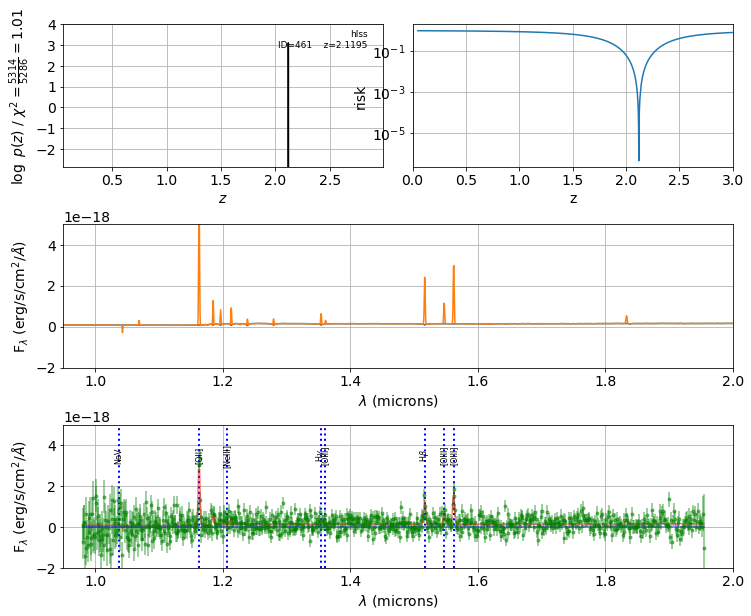

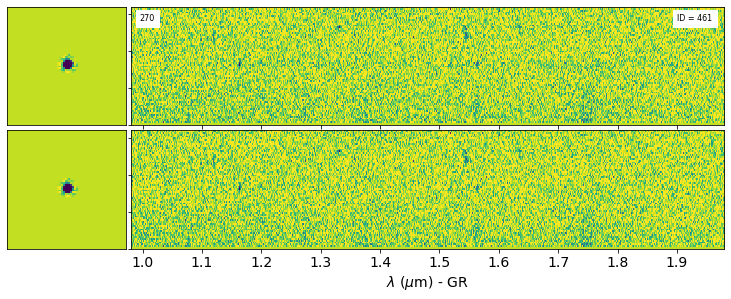

In [65]:
id = 461
tbl = all_match_clean_tbl

for col in ['z_true','mag_auto',"REDSHIFT","SN001","SN002","m_new"]:
    tbl[col].info.format = '.3f'
tbl['d2d'].info.format = '.3e'    
    
filt = tbl['id'] == id
print(tbl['z_true','mag_auto',"REDSHIFT",'m_new','d2d'][filt])
print(tbl['d2d'][filt].to(u.arcsec))
print(tbl["LINE001","SN001","LINE002","SN002",][filt])
z_in = tbl["z_true"][filt][0]
#z_in = tbl["REDSHIFT"][filt][0]

#display_grizli("my_roman_sims", id, w0=0.95, w1=2.0)
display_grizli("hlss", id, w0=0.95, w1=2.0, z_in=z_in, y0=-2e-18, y1=5e-18)

In [ ]:
print(dir())
#print(__dict__)